In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.legend_handler import HandlerTuple

In [2]:
TICK_LABEL_SIZE = 22
AXIS_LABEL_SIZE = 26
AXIS_TITLE_SIZE =  30
FIGURE_TITLE_SIZE = 34
LEGEND_FONT_SIZE = 15

In [3]:
LIGHTORANGE = plt.cm.tab20.colors[3]
ORANGE = plt.cm.tab20.colors[2]

LIGHTGREEN = plt.cm.tab20.colors[5]
GREEN = plt.cm.tab20.colors[4]

BLACK = "black"

In [37]:
def barplot(accuracy_scores: dict[str, list], plot_title: str) -> mpl.figure.Figure:
    """
    """
    rotation = ("picture-plane\nrotation", "in-depth\nrotation")

    x = np.arange(len(rotation))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(figsize=(10, 6), layout="tight")

    for attribute, rest in accuracy_scores.items():
        scores, color = rest
        offset = width * multiplier
        rects = ax.bar(
            x + offset,
            scores,
            width,
            edgecolor=BLACK,
            color=color,
            hatch="//" if attribute == "train" else None
        )
        
        ax.bar_label(rects, padding=3, labels=[f"{round(val):d}" if val > 0 else "" for val in rects.datavalues], fontsize=TICK_LABEL_SIZE)
        multiplier += 1

    ax.set_ylim(0, 115)
    ax.set_yticks(np.arange(0, 115, 20))
    ax.set_yticklabels(np.arange(0, 115, 20), fontsize=TICK_LABEL_SIZE)
    ax.set_ylabel("Accuracy, %", fontsize=AXIS_LABEL_SIZE)

    ax.set_xticks(x + width/2, rotation, fontsize=TICK_LABEL_SIZE)

    legend_elements = [
        (
            Patch(facecolor=LIGHTORANGE, edgecolor=BLACK, hatch="//"),
            Patch(facecolor=LIGHTGREEN, edgecolor=BLACK, hatch="//")
        ),
        (
            Patch(facecolor=ORANGE, edgecolor=BLACK),
            Patch(facecolor=GREEN, edgecolor=BLACK)
        ),
    ]
    ax.legend(
        handles=legend_elements,
        labels=["Train", "Test"],
        fontsize=LEGEND_FONT_SIZE,
        numpoints=2,
        handler_map={tuple: HandlerTuple(ndivide=None)},
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        borderaxespad=0.
    )

    fig.suptitle(plot_title, fontsize=AXIS_LABEL_SIZE, y=1.);

    return fig


## ResNet18

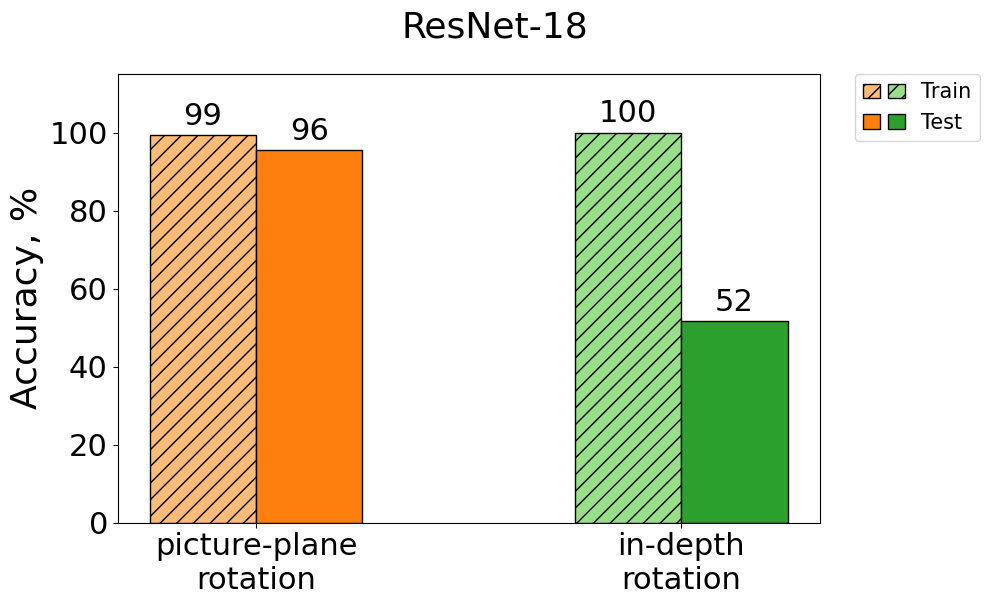

In [5]:
accuracy_scores = {
    "train": [(99.31641, 100.), (LIGHTORANGE, LIGHTGREEN)],
    "test": [(95.50781, 51.75781), (ORANGE, GREEN)],
}
title = "ResNet-18"

figure = barplot(accuracy_scores, plot_title=title);

figure.savefig("../media/resnet18-siamesenet.png", dpi=150)

## ResNet34

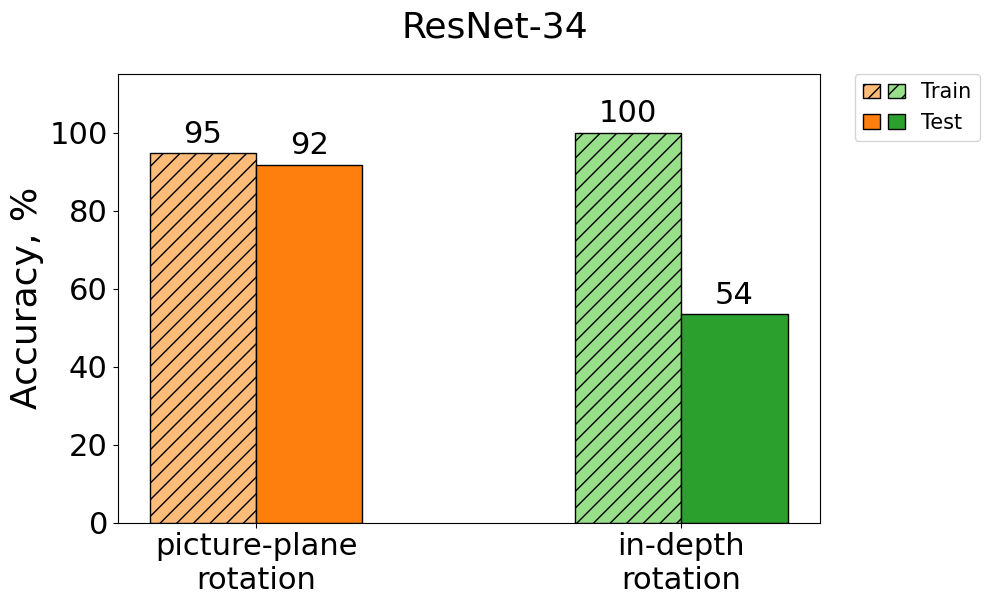

In [6]:
accuracy_scores = {
    "train": [(94.72656, 100.), (LIGHTORANGE, LIGHTGREEN)],
    "test": [(91.79688, 53.51563), (ORANGE, GREEN)],
}
title = "ResNet-34"

figure = barplot(accuracy_scores, plot_title=title);

figure.savefig("../media/resnet34-siamesenet.png", dpi=150)

## ResNet50

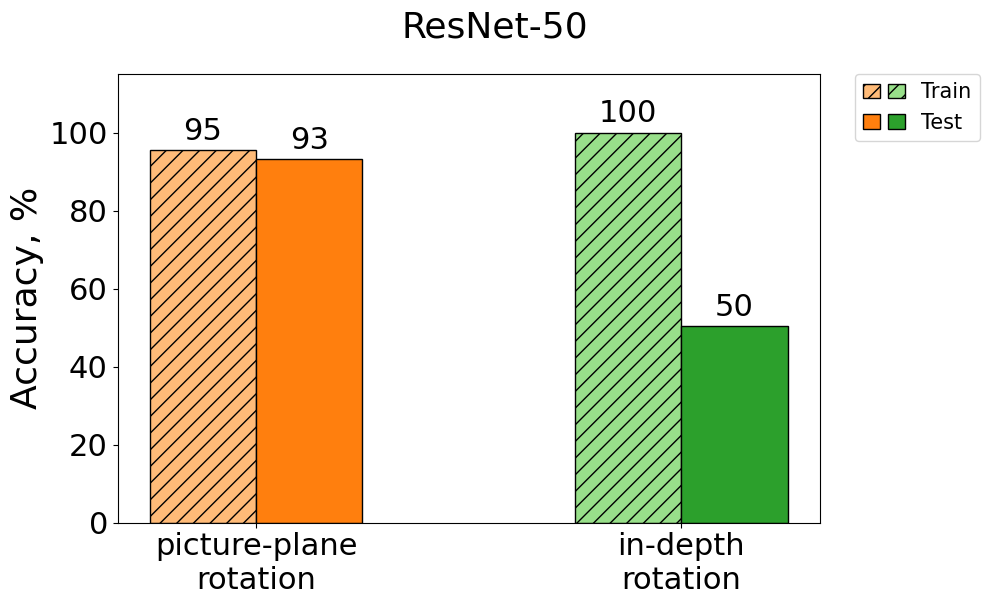

In [7]:
accuracy_scores = {
    "train": [(95.41016, 100.), (LIGHTORANGE, LIGHTGREEN)],
    "test": [(93.16406, 50.29297), (ORANGE, GREEN)],
}
title = "ResNet-50"

figure = barplot(accuracy_scores, plot_title=title);

figure.savefig("../media/resnet50-siamesenet.png", dpi=150)

## ViT-B-16 (modified)

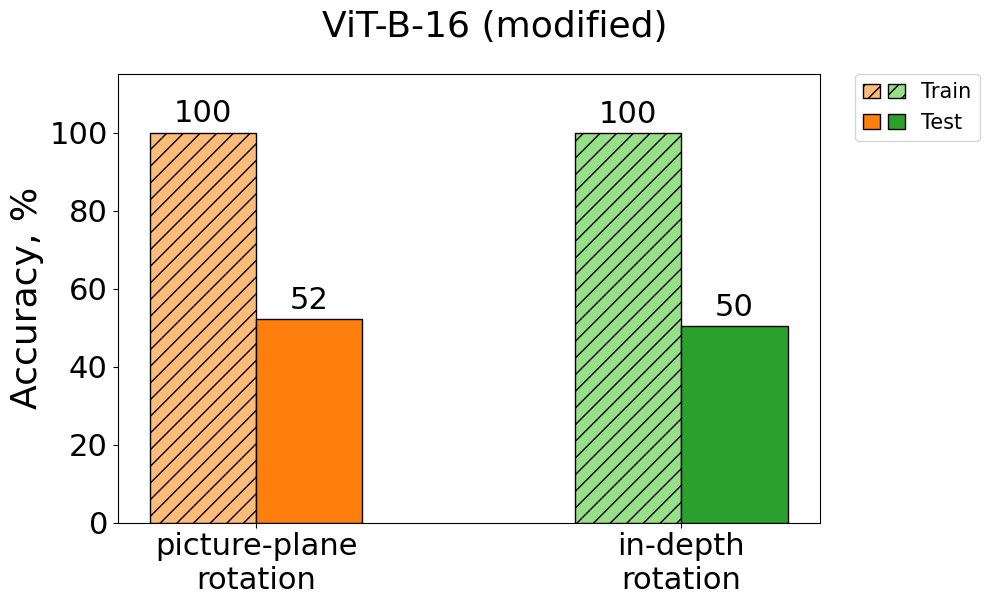

In [8]:
accuracy_scores = {
    "train": [(100., 99.80469), (LIGHTORANGE, LIGHTGREEN)],
    "test": [(52.14844, 50.29297), (ORANGE, GREEN)],
}
title = "ViT-B-16 (modified)"

figure = barplot(accuracy_scores, plot_title=title);

figure.savefig("../media/vitb16-siamesenet.png", dpi=150)

## SL-ViT

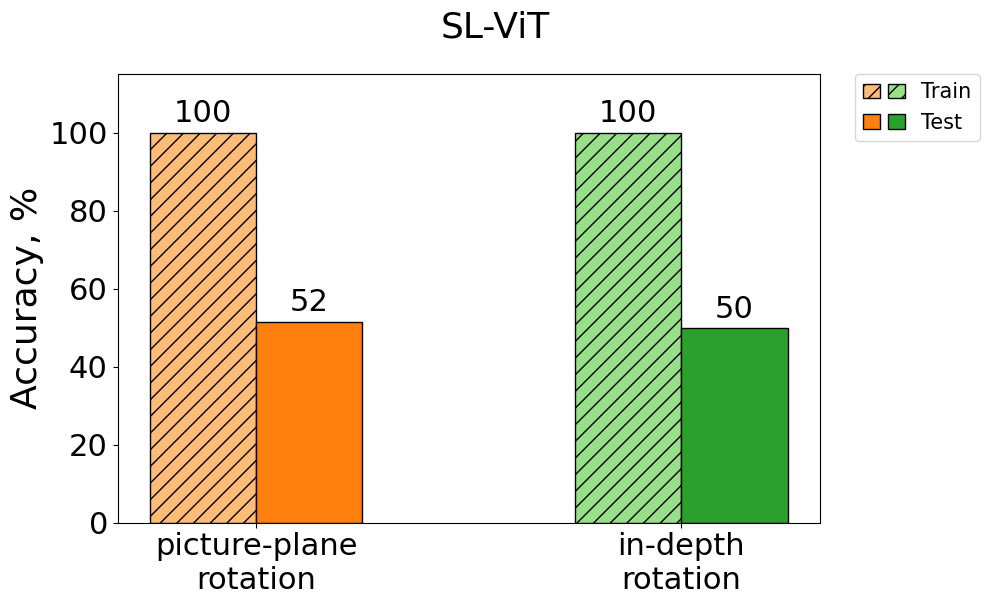

In [9]:
accuracy_scores = {
    "train": [(100., 100.), (LIGHTORANGE, LIGHTGREEN)],
    "test": [(51.5625, 49.90234), (ORANGE, GREEN)],
}
title = "SL-ViT"

figure = barplot(accuracy_scores, plot_title=title);

figure.savefig("../media/sl-vit-siamesenet.png", dpi=150)

# ResNet-50 Max-margin Contrastive Loss Pre-training + Linear Evaluation

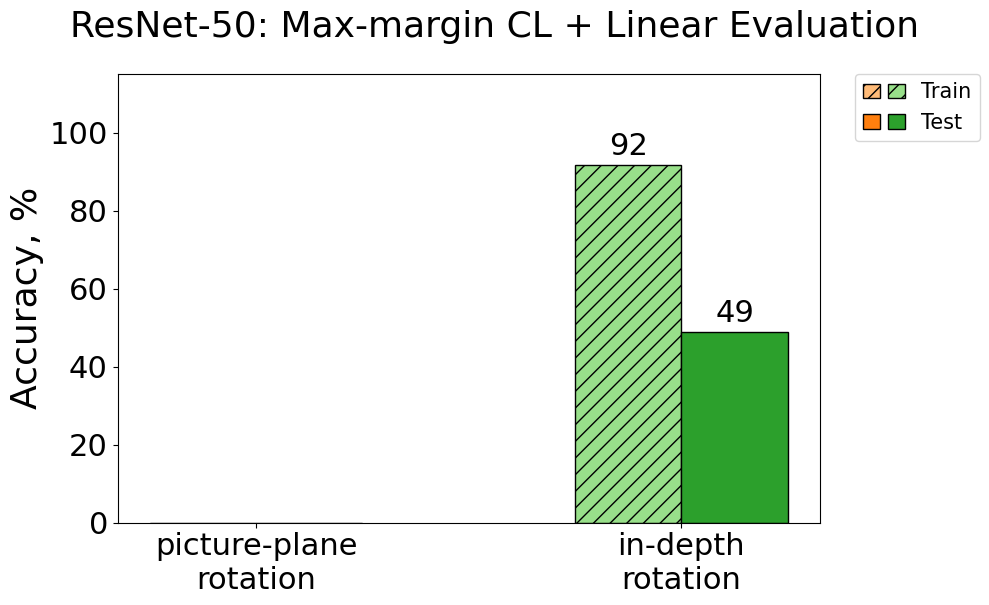

In [40]:
accuracy_scores = {
    "train": [(-1, 91.74805), (LIGHTORANGE, LIGHTGREEN)],
    "test": [(-1, 48.82813), (ORANGE, GREEN)],
}
title = "ResNet-50: Max-margin CL + Linear Evaluation"

figure = barplot(accuracy_scores, plot_title=title);

figure.savefig("../media/resnet50-cl+linear-evaluation.png", dpi=150)

# Resnet-18: Effect of the angular distance on the accuracy

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1081871/3165139872.py:5: SyntaxWarning: invalid escape sequence '\d'
  rotations = [f"${angle}\degree$" for angle in np.linspace(20, 180, 9, dtype=int)]


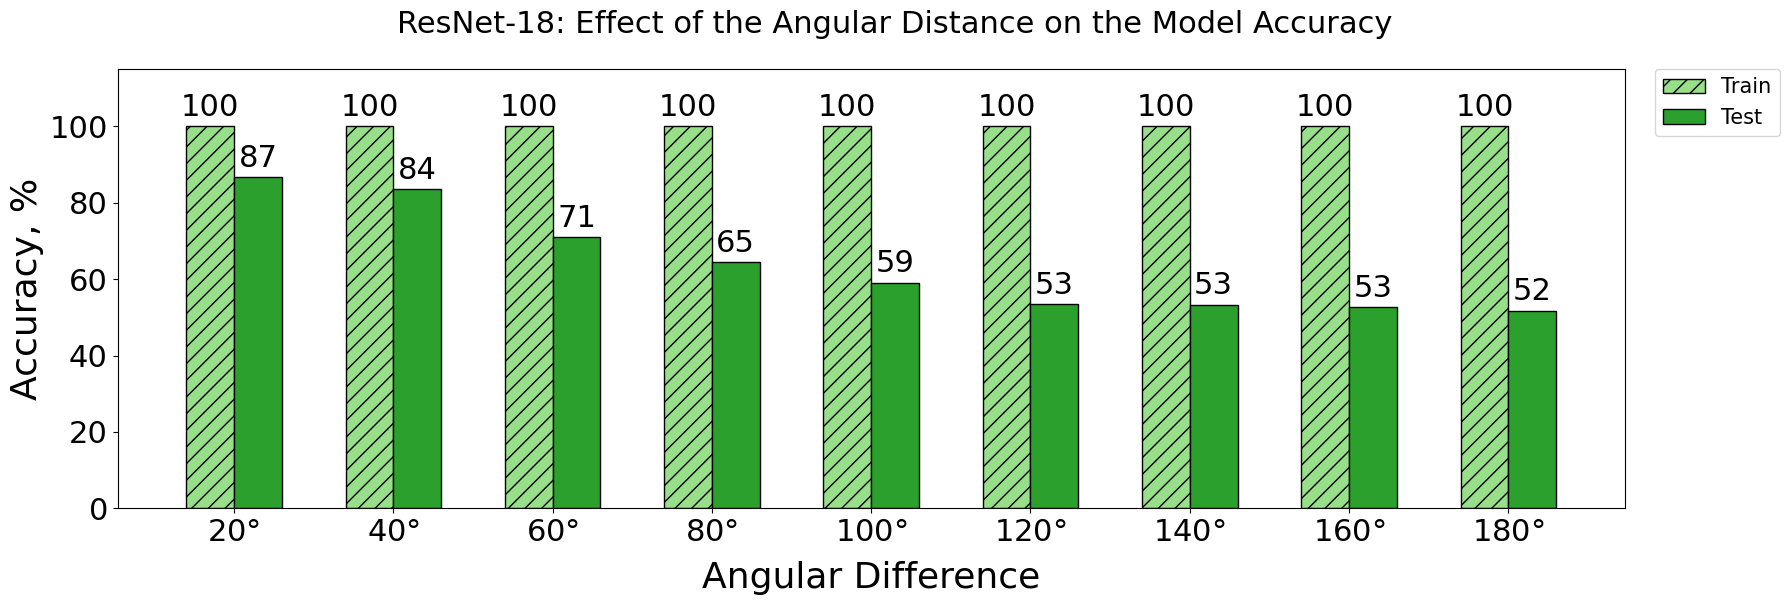

In [45]:
accuracy_scores = {
    "train": [100., 100., 100., 100., 100., 100., 100., 100., 100.],
    "test": [86.71875, 83.59375, 71.09375, 64.55078, 59.08203, 53.41797, 53.32031, 52.73438, 51.75781],
}
rotations = [f"${angle}\degree$" for angle in np.linspace(20, 180, 9, dtype=int)]


x = np.arange(len(rotations))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(18, 6), layout="tight")

for attribute, scores in accuracy_scores.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        scores,
        width,
        edgecolor=BLACK,
        color=LIGHTGREEN if attribute == "train" else GREEN,
        hatch="//" if attribute == "train" else None
    )
    ax.bar_label(rects, padding=3, labels=[f"{round(val):d}" for val in rects.datavalues], fontsize=TICK_LABEL_SIZE)
    multiplier += 1

ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 115, 20))
ax.set_yticklabels(np.arange(0, 115, 20), fontsize=TICK_LABEL_SIZE)
ax.set_ylabel("Accuracy, %", fontsize=AXIS_LABEL_SIZE)

ax.set_xticks(x + width/2, rotations, fontsize=TICK_LABEL_SIZE)
ax.set_xlabel("Angular Difference", fontsize=AXIS_LABEL_SIZE, labelpad=10)

legend_elements = [
    Patch(facecolor=LIGHTGREEN, edgecolor=BLACK, hatch="//"),
    Patch(facecolor=GREEN, edgecolor=BLACK)
]
ax.legend(
    handles=legend_elements,
    labels=["Train", "Test"],
    fontsize=LEGEND_FONT_SIZE,
    numpoints=2,
    handler_map={tuple: HandlerTuple(ndivide=None)},
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.
)

fig.suptitle("ResNet-18: Effect of the Angular Distance on the Model Accuracy", fontsize=TICK_LABEL_SIZE, y=1.);
fig.savefig("../media/resnet18,in-depth-rotation,accuracy-vs-angular-difference.png", dpi=150)

# ResNet-18: Curriculum Learning

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1081871/2188096731.py:5: SyntaxWarning: invalid escape sequence '\d'
  rotations = [f"${angle}\degree$" for angle in np.linspace(20, 180, 9, dtype=int)]


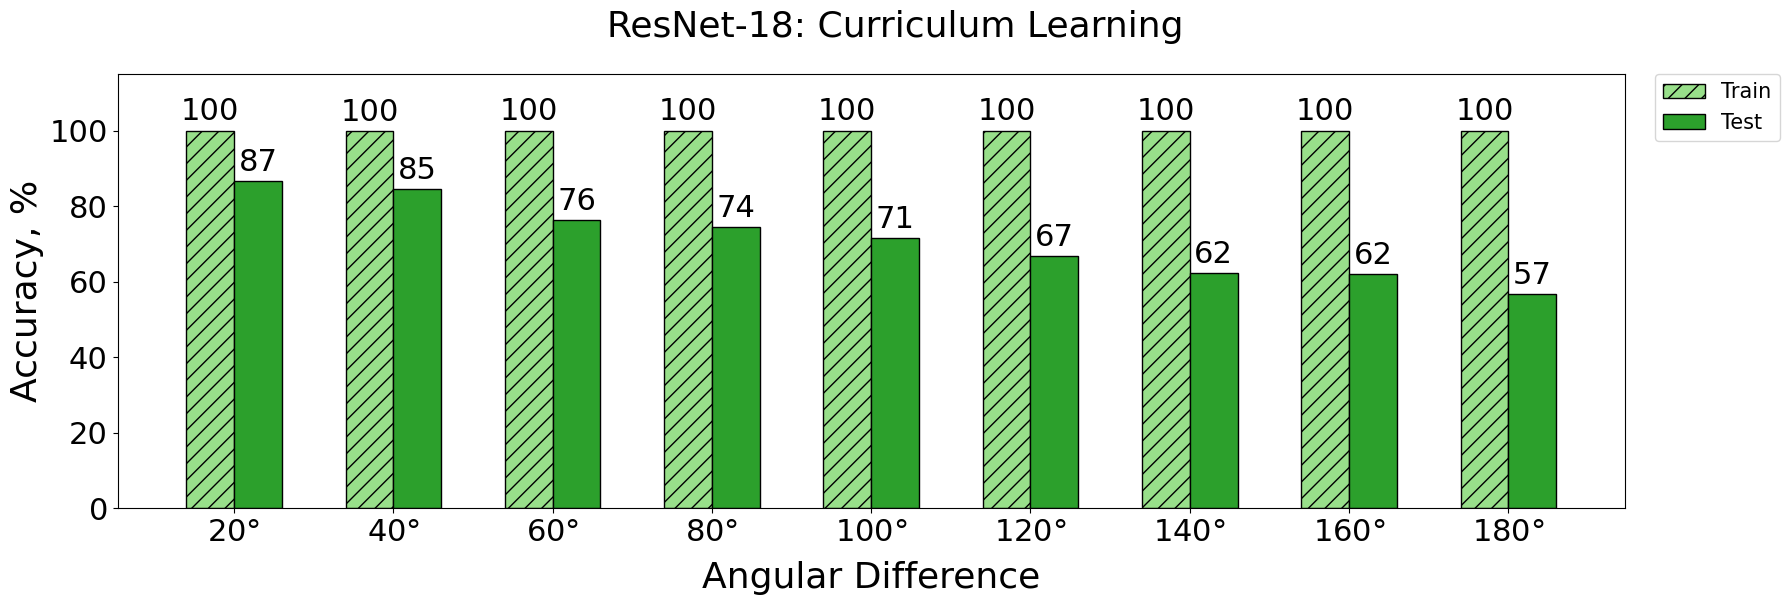

In [47]:
accuracy_scores = {
    "train": [100., 99.90234, 100., 100., 100., 100., 100., 100., 100.],
    "test": [86.71875, 84.57031, 76.4323, 74.4140625, 71.484375, 66.79688, 62.40234, 62.01172, 56.68945],
}
rotations = [f"${angle}\degree$" for angle in np.linspace(20, 180, 9, dtype=int)]


x = np.arange(len(rotations))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(18, 6), layout="tight")

for attribute, scores in accuracy_scores.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        scores,
        width,
        edgecolor=BLACK,
        color=LIGHTGREEN if attribute == "train" else GREEN,
        hatch="//" if attribute == "train" else None
    )
    ax.bar_label(rects, padding=3, labels=[f"{round(val):d}" for val in rects.datavalues], fontsize=TICK_LABEL_SIZE)
    multiplier += 1

ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 115, 20))
ax.set_yticklabels(np.arange(0, 115, 20), fontsize=TICK_LABEL_SIZE)
ax.set_ylabel("Accuracy, %", fontsize=AXIS_LABEL_SIZE)

ax.set_xticks(x + width/2, rotations, fontsize=TICK_LABEL_SIZE)
ax.set_xlabel("Angular Difference", fontsize=AXIS_LABEL_SIZE, labelpad=10)

legend_elements = [
    Patch(facecolor=LIGHTGREEN, edgecolor=BLACK, hatch="//"),
    Patch(facecolor=GREEN, edgecolor=BLACK)
]
ax.legend(
    handles=legend_elements,
    labels=["Train", "Test"],
    fontsize=LEGEND_FONT_SIZE,
    numpoints=2,
    handler_map={tuple: HandlerTuple(ndivide=None)},
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.
)

fig.suptitle("ResNet-18: Curriculum Learning", fontsize=AXIS_LABEL_SIZE, y=1.);
fig.savefig("../media/resnet18,in-depth-rotation,curriculum-learning.png", dpi=150)